### Smallest Number recognized by This Computer

Machine epsilon (ε_mach) is the smallest positive number such that $1 + 𝜀 > 1$ in floating-point arithmetic. It tells us the precision limit of the machine (i.e., how close two numbers can be while still being distinguishable).

🔹 Step-by-step Computation Idea:

We can compute it iteratively by halving a number until adding it to 1 no longer changes the result (because of rounding).

In [ ]:
x = 1.0
epsilon = 0.1

while(x != (x + epsilon)):
    epsilon = epsilon/2

print("The Smallest number recognized by this computer is of order ",epsilon)

The Smallest number recognized by this computer is of order  8.881784197001253e-17


# Catastrophic Cancellation

Catastrophic cancellation occurs when subtracting two nearly equal numbers, causing a **loss of significant digits** in floating-point arithmetic. This can make computations highly inaccurate.

## Example

```math
f(x) = 1 - \cos(x)
```

For very small x, `cos(x) ≈ 1`. Computing `1 - cos(x)` directly leads to **catastrophic cancellation**.

## Stable Alternative

A numerically stable way to compute `1 - cos(x)` is using the trigonometric identity:

```math
1 - \cos(x) = 2 \sin^2(x/2)
```

This avoids subtracting nearly equal numbers and preserves accuracy for small x.



###

           x |               Direct |               Stable |            Abs Error
--------------------------------------------------------------------------------
     1.0e-01 | 4.880884817015163e-02 | 4.880884817015155e-02 | 8.326672684688674e-17
     1.0e-03 | 4.998750624609638e-04 | 4.998750624609648e-04 | 9.757819552369540e-19
     1.0e-05 | 4.999987500031722e-06 | 4.999987500062500e-06 | 3.077863620437951e-17
     1.0e-07 | 4.999999880794803e-08 | 4.999999875000006e-08 | 5.794797237627984e-17
     1.0e-09 | 5.000000413701855e-10 | 4.999999998750000e-10 | 4.149518548705580e-17
     1.0e-11 | 5.000000413701855e-12 | 4.999999999987500e-12 | 4.137143550956219e-19
     1.0e-13 | 4.996003610813204e-14 | 4.999999999999876e-14 | 3.996389186671395e-17


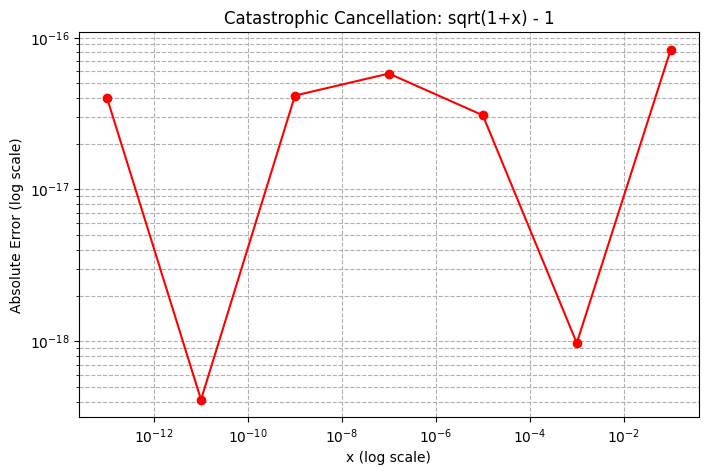

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Very small x values to see cancellation effect
x_values = np.array([1e-1, 1e-3, 1e-5, 1e-7, 1e-9, 1e-11, 1e-13])

# Direct computation
direct = np.sqrt(1 + x_values) - 1

# Stable computation using conjugate
stable = x_values / (np.sqrt(1 + x_values) + 1)

# Absolute error
abs_error = np.abs(direct - stable)

# Table
print(f"{'x':>12} | {'Direct':>20} | {'Stable':>20} | {'Abs Error':>20}")
print("-"*80)
for i, x in enumerate(x_values):
    print(f"{x:12.1e} | {direct[i]:20.15e} | {stable[i]:20.15e} | {abs_error[i]:20.15e}")

# Plot
plt.figure(figsize=(8,5))
plt.loglog(x_values, abs_error, 'o-', color='red')
plt.xlabel('x (log scale)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Catastrophic Cancellation: sqrt(1+x) - 1')
plt.grid(True, which="both", ls="--")
plt.show()


### Probable Fixes for Catastrophic Cancellation

1. Algebraic Reformulation
Use identities or factorization to avoid subtracting nearly equal numbers.

2. Stable Functions
Use library functions designed for numerical stability, such as `log1p` (for log(1+x)) or `expm1` (for exp(x)-1).

3. High-Precision Arithmetic
Use Python libraries like `decimal` or `mpmath` for computations that require very high precision.

4. Numerically Stable Algorithms
Techniques include Horner’s method for polynomial evaluation, Kahan summation for adding many numbers, and higher-order finite differences for derivatives.

5. Series Expansion
Approximate small quantities using Taylor expansions when appropriate to reduce cancellation errors.
